In [1]:
from utils.imports import *

In [11]:
passengers, drivers, adj, nodes = initialize_data(True)
edited_passengers = pd.read_pickle('data/edited_passengers.pkl')
edited_drivers = pd.read_pickle('data/edited_drivers.pkl')

# T1

In [3]:
def find_driver1(passenger, drivers, nodes, adj, find_path):
    return drivers[0], 0

In [4]:
res_cus, res_driv, res_time = match(slow_get_closest_node, find_driver1, dijkstra)

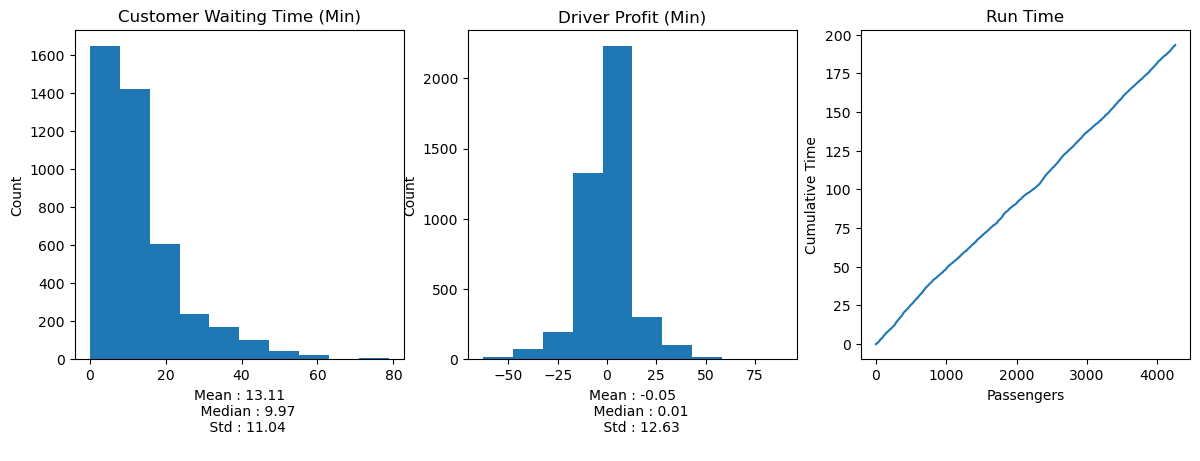

In [5]:
process_results(res_cus, res_driv, res_time)

# T2

In [5]:
def binary_search(drivers, time):
    left, mid, right = 0, 0, len(drivers) - 1
    
    while left <= right:
        mid = (left + right)//2
        if drivers[mid][0] < time:
            left = mid + 1
        elif drivers[mid][0] > time:
            right = mid - 1
        else:
            break
    
    return mid

def find_driver2(passenger, drivers, nodes, adj, find_path):
    eligible_point = binary_search(drivers, passenger[0])
    
    if drivers[eligible_point][0] > passenger[0]:
        eligible_point -= 1
    
    passenger_node = passenger[1]
    
    closest_node = None
    closest_dist = float('inf')
    for i in range(eligible_point + 1):
        driver_node = drivers[i][1]
        euclid = (nodes[driver_node]['lon'] - nodes[passenger_node]['lon'])**2
        euclid += (nodes[driver_node]['lat'] - nodes[passenger_node]['lat'])**2
        
        if euclid < closest_dist:
            closest_dist = euclid
            closest_node = (drivers[i], i)
    
    return closest_node

In [7]:
res_cus, res_driv, res_time = match(slow_get_closest_node, find_driver2, dijkstra)

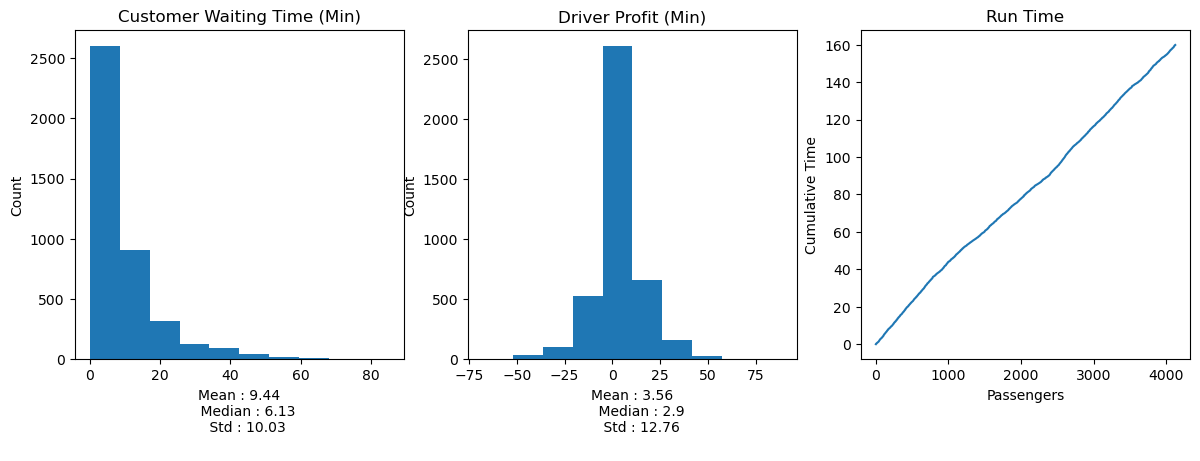

In [8]:
process_results(res_cus, res_driv, res_time)

# T3

In [4]:
def find_driver3(passenger, drivers, nodes, adj, find_path):
    eligible_point = binary_search(drivers, passenger[0])
    passenger_node = passenger[1]
    
    if drivers[eligible_point][0] > passenger[0]:
        eligible_point -= 1
    
    closest_node = None
    closest_dist = float('inf')
    for i in range(eligible_point + 1):
        driver_node = drivers[i][1]
                 
        cap = get_edge_num(drivers[i][2], drivers[i][3])
        dist = find_path(driver_node, passenger[1], adj, nodes, cap)
        
        if dist < closest_dist:
            closest_dist = dist
            closest_node = (drivers[i], i)
    
    return closest_node

In [6]:
res_cus, res_driv, res_time = match(slow_get_closest_node, find_driver3, dijkstra, prob_stay = 0.75)

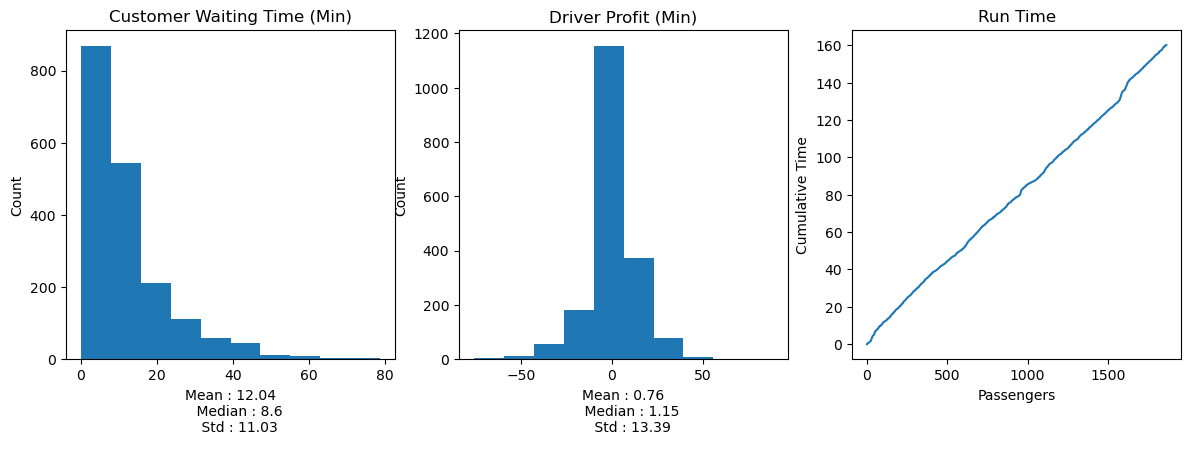

In [7]:
process_results(res_cus, res_driv, res_time)

# T4

In [8]:
res_cus, res_driv, res_time = match(fast_get_closest_node, find_driver3, astar, prob_stay = 0.75)

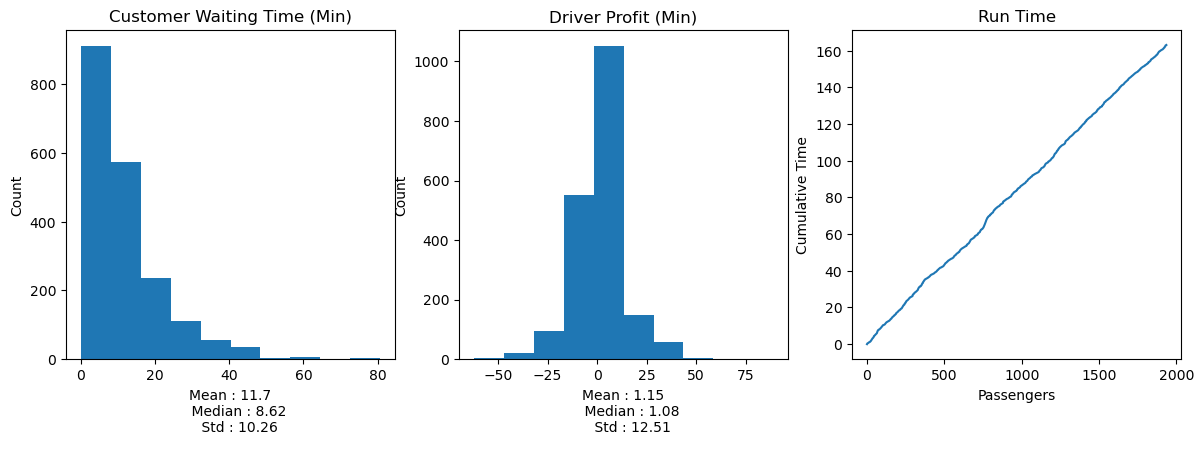

In [9]:
process_results(res_cus, res_driv, res_time)

# T5

In [14]:
def find_driver5(passenger, drivers, nodes, adj, find_path):
    nodes_label = pd.read_pickle('data/nodes_label.pkl')
    node_dists = pd.read_pickle('data/node_dists.pkl')
    
    closest_node = None
    closest_dist = float('inf')
    passenger_node = passenger[1]
    
    for i in range(len(drivers)):
        driver = drivers[i]
        driver_node = driver[1]
        
        if driver[0] > passenger[0]:
            return closest_node
        
        dist = node_dists[(nodes_label[driver_node], nodes_label[passenger_node])]
        
        if dist < closest_dist:
            closest_dist = dist
            closest_node = (driver, i)
        
        if dist == 0:
            return closest_node

In [15]:
res_cus, res_driv, res_time = match(fast_get_closest_node, find_driver5, astar)

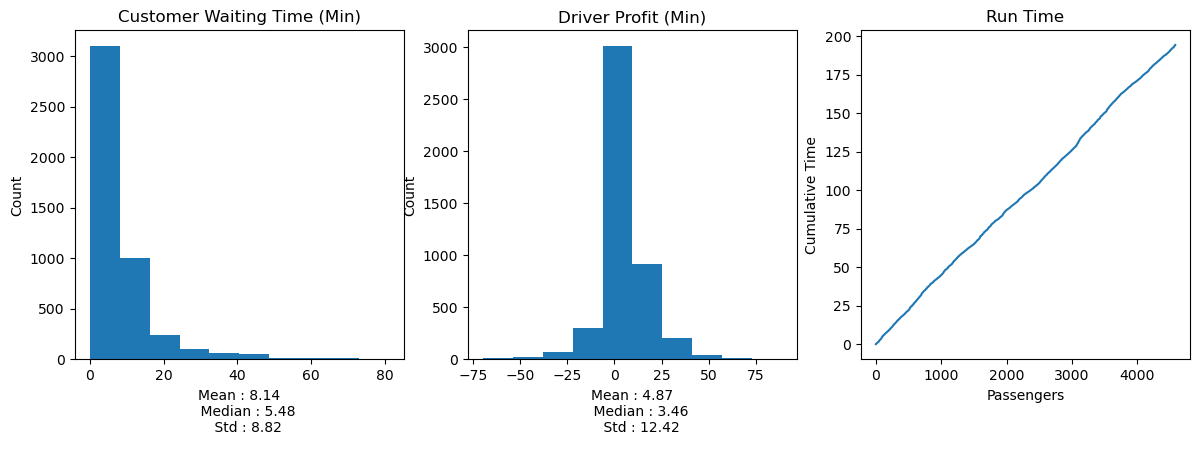

In [16]:
process_results(res_cus, res_driv, res_time)

In [19]:
start = time.time()

for p in passengers:
    source = {'lat':p[1], 'lon':p[2]}
    source_node = slow_get_closest_node(source, nodes)
    dest = {'lat':p[3], 'lon':p[4]}
    dest_node = slow_get_closest_node(dest, nodes)

for d in drivers:
    loc = {'lat':d[1], 'lon':d[2]}
    node = slow_get_closest_node(loc, nodes)

end = time.time()
print(f'Slow Implementation Takes {np.round(end - start, 2)} Seconds')
start = time.time()
for p in passengers:
    source = {'lat':p[1], 'lon':p[2]}
    source_node = fast_get_closest_node(source, nodes)
    dest = {'lat':p[3], 'lon':p[4]}
    dest_node = fast_get_closest_node(dest, nodes)

for d in drivers:
    loc = {'lat':d[1], 'lon':d[2]}
    node = fast_get_closest_node(loc, nodes)

end = time.time()
print(f'Fast Implementation Takes {np.round(end - start, 2)} Seconds')

Slow Implementation Takes 93.67 Seconds
Fast Implementation Takes 76.7 Seconds


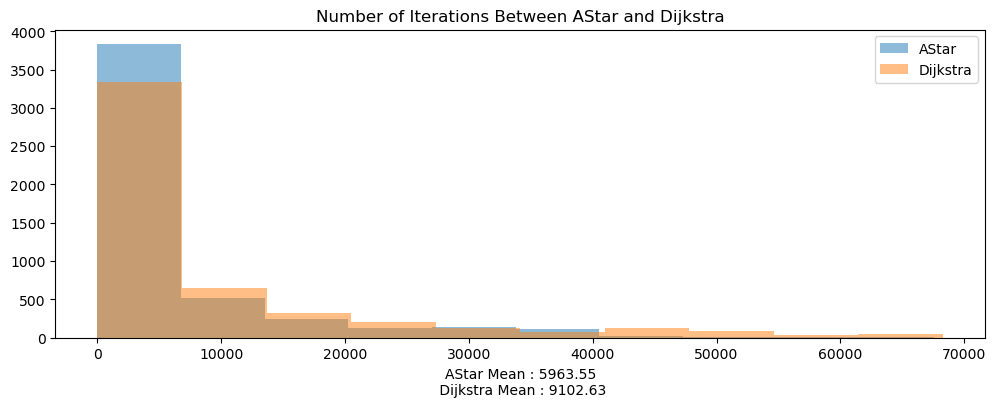

In [66]:
plt.hist(np.array(astar_list), alpha = 0.5, label = 'AStar')
plt.hist(np.array(dijkstra_list), alpha = 0.5, label = 'Dijkstra')
plt.legend()
plt.title("Number of Iterations Between AStar and Dijkstra")
plt.xlabel(f'AStar Mean : {np.round(np.array(astar_list).mean(), 2)}\n Dijkstra Mean : {np.round(np.array(dijkstra_list).mean(), 2)}')
plt.show()

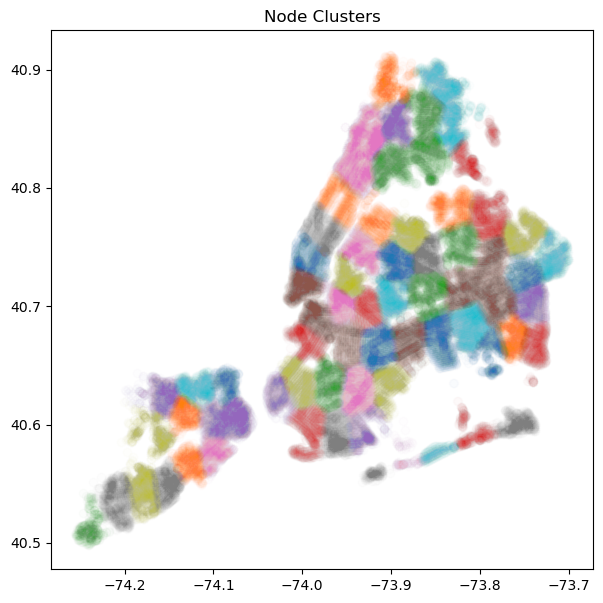

In [79]:
nodes_df = pd.DataFrame(nodes)
nodes_df = nodes_df.T.reset_index()
nodes_df = nodes_df.rename(columns = {'index':'node'})
plt.rcParams['figure.figsize'] = [7, 5]

X = nodes_df[['lon', 'lat']]

NUM_CLUSTERS = 70
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=0, n_init="auto").fit(X)

nodes_df['label'] = kmeans.labels_
plt.rcParams['figure.figsize'] = [7,7]
plt.title("Node Clusters")
for i in range(NUM_CLUSTERS):
    subset = nodes_df.loc[nodes_df['label'] == i]
    plt.scatter(subset['lon'], subset['lat'], alpha = 0.01)


In [84]:
node_dists = pd.read_pickle('data/node_dists.pkl')
nodes_label = pd.read_pickle('data/nodes_label.pkl')

In [85]:
nodes_label

{42467330: 35,
 42467331: 50,
 42467333: 50,
 42467334: 50,
 42467335: 50,
 42467337: 50,
 42991626: 32,
 42467339: 50,
 42860546: 66,
 42991630: 32,
 42467343: 50,
 42467346: 50,
 42860563: 66,
 42467350: 50,
 42991641: 32,
 42860570: 66,
 42467355: 50,
 42991645: 32,
 42467360: 50,
 42860580: 66,
 42467369: 27,
 42860586: 66,
 42467372: 27,
 42467374: 27,
 42860591: 66,
 42991666: 32,
 42860595: 66,
 42860598: 66,
 42860601: 66,
 42860603: 66,
 42860605: 66,
 42860609: 66,
 42729538: 19,
 42467396: 33,
 42860613: 66,
 42860615: 66,
 42860617: 66,
 42860618: 66,
 42467403: 33,
 42467405: 33,
 42860622: 66,
 2757492815: 14,
 42860624: 66,
 42991698: 1,
 42991702: 1,
 598321849: 48,
 42467417: 33,
 42860635: 40,
 42445498: 55,
 42991710: 1,
 42467425: 35,
 42838715: 17,
 280232037: 15,
 42991718: 1,
 42467431: 35,
 42467435: 35,
 42467437: 35,
 42991727: 1,
 42860656: 17,
 2024822120: 61,
 42467443: 35,
 42991732: 1,
 42860663: 17,
 42467448: 35,
 42467452: 35,
 42991741: 1,
 42467454: 

#### 